In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
data = pd.read_csv(r"C:\jupyter_notebook\amazon_alexa.tsv", delimiter = '\t', quoting = 3)
print(f"Dataset Shape : {data.shape}")

Dataset Shape : (3150, 5)


In [11]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [12]:
print(f'Features names:{data.columns.values}')

Features names:['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [13]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [14]:
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [16]:
data.dropna(inplace = True)

In [17]:
print(f'The shape of data after dropping null value is: {data.shape}')

The shape of data after dropping null value is: (3149, 5)


In [18]:
data['length'] = data['verified_reviews'].apply(len)

In [19]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [21]:
print(f"verified reviews: {data.iloc[10]['verified_reviews']}")
print(f"length of review :{len(data.iloc[10]['verified_reviews'])}")
print(f"length of review from column is: {data.iloc[10]['length']}")

verified reviews: "I sent it to my 85 year old Dad, and he talks to it constantly."
length of review :65
length of review from column is: 65


In [22]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [23]:
#Analyzing the rating column



In [24]:
len(data)

3149

In [25]:
print(f"Rating value count: \n {data['rating'].value_counts()}")

Rating value count: 
 rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


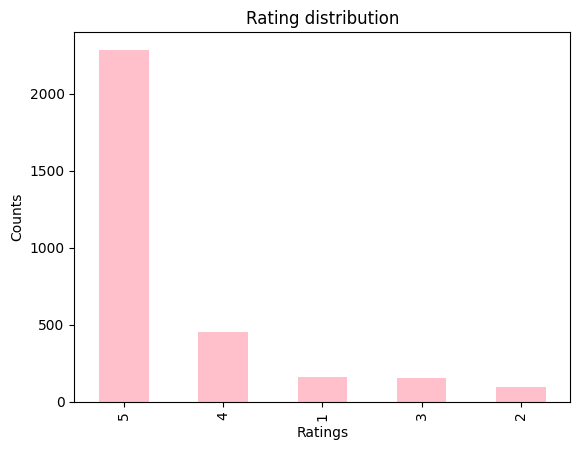

In [26]:
data['rating'].value_counts().plot.bar(color = 'pink')
plt.title("Rating distribution")
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.show()

In [27]:
print(f" Rating value in percentage: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

 Rating value in percentage: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


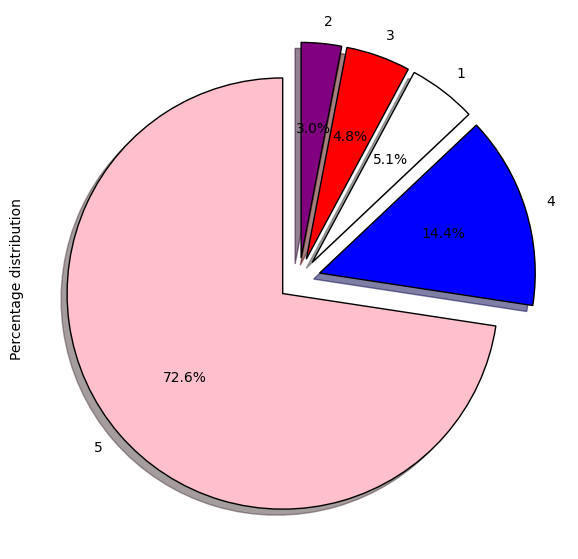

In [31]:
 fig = plt.figure(figsize=(7,7))
colors = ('pink', 'blue', 'white', 'red', 'purple')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
tags.plot(kind = 'pie', autopct="%1.1f%%", shadow = True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage distribution')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format='png')

In [32]:
#Analyzing the feedback Column

In [34]:
print(f"Feedback Values: {data['feedback'].value_counts()}")

Feedback Values: feedback
1    2893
0     256
Name: count, dtype: int64


In [35]:
review0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review0)

Sound is terrible if u want good music too get a bose


In [37]:
review1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review1)

Loved it!


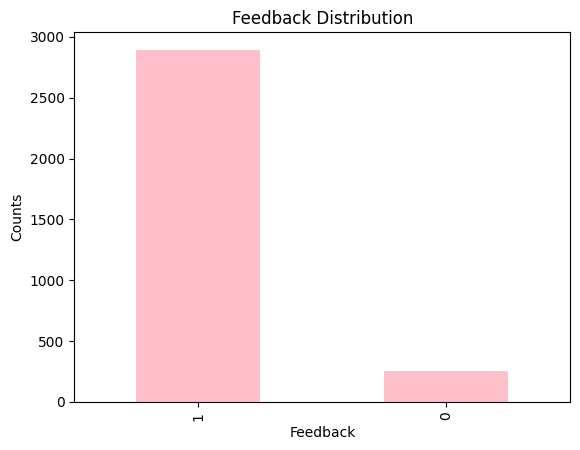

In [39]:
data['feedback'].value_counts().plot.bar(color='pink')
plt.title("Feedback Distribution")
plt.xlabel("Feedback")
plt.ylabel("Counts")
plt.show()

In [40]:
print(f" Rating value in percentage: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

 Rating value in percentage: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


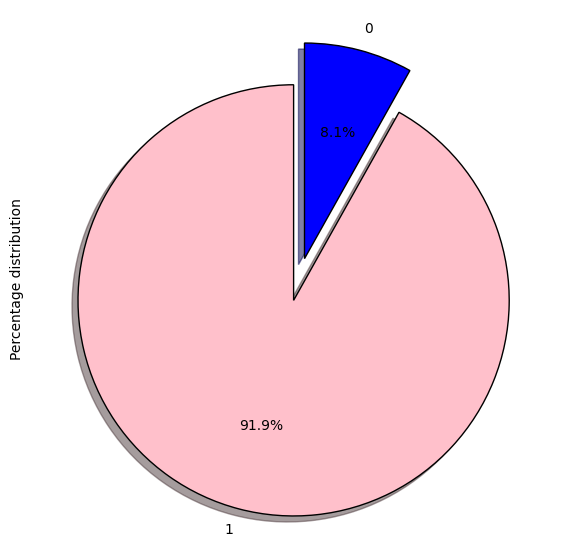

In [42]:
 fig = plt.figure(figsize=(7,7))
colors = ('pink', 'blue', 'white', 'red', 'purple')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['feedback'].value_counts()/data.shape[0]
explode = (0.1, 0.1)
tags.plot(kind = 'pie', autopct="%1.1f%%", shadow = True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage distribution')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format='png')

In [43]:
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [44]:
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [45]:
#Analyzing variation column

In [48]:
print(f"Variation values : \n{data['variation'].value_counts()}")

Variation values : 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


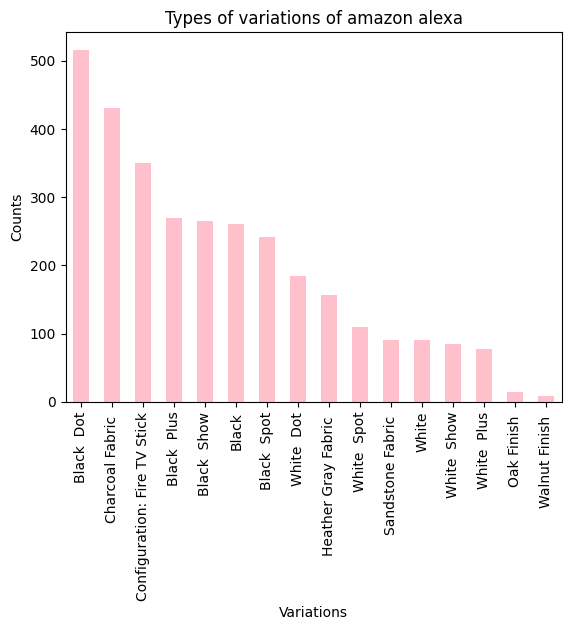

In [49]:
data['variation'].value_counts().plot.bar(color='pink')
plt.title("Types of variations of amazon alexa")
plt.xlabel("Variations")
plt.ylabel("Counts")
plt.show()

In [50]:
print(f" Rating value in percentage: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

 Rating value in percentage: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [51]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

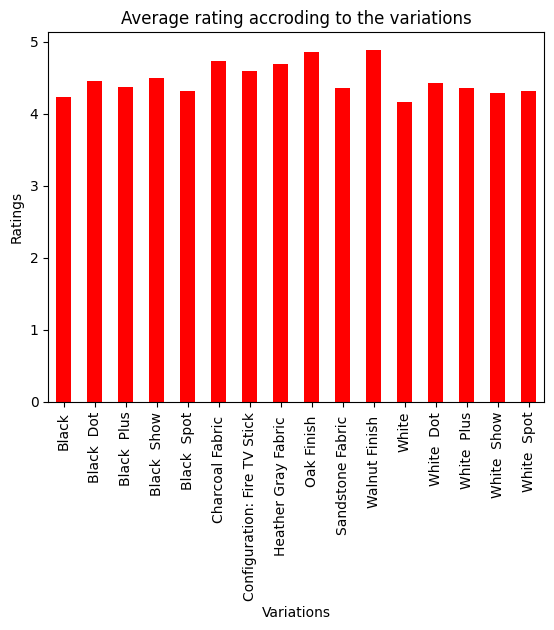

In [59]:
data.groupby('variation')['rating'].mean().plot.bar(color = 'red')
plt.title("Average rating accroding to the variations")
plt.xlabel("Variations")
plt.ylabel("Ratings")
plt.show()

In [60]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length review')]

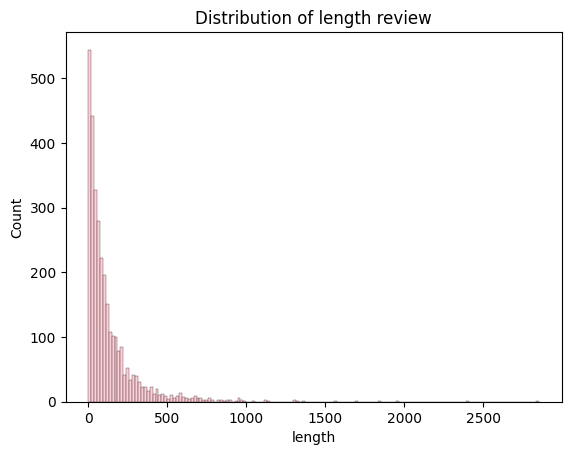

In [61]:
sns.histplot(data['length'],color='pink').set(title='Distribution of length review')

[Text(0.5, 1.0, 'Distribution of length of negative feedback')]

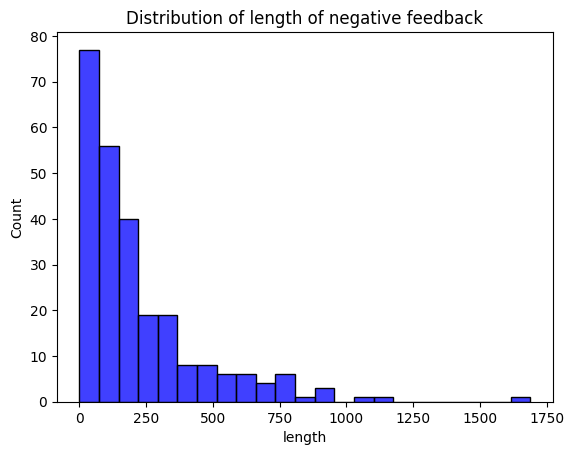

In [63]:
sns.histplot(data[data['feedback'] ==0]['length'],color='blue').set(title='Distribution of length of negative feedback')

[Text(0.5, 1.0, 'Distribution of length of positive feedback')]

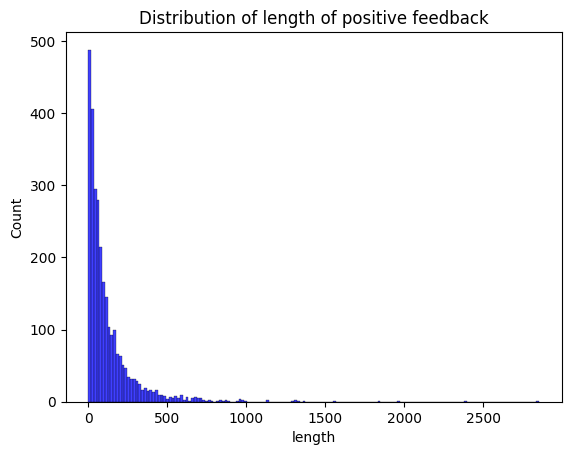

In [65]:
sns.histplot(data[data['feedback'] ==1]['length'],color='blue').set(title='Distribution of length of positive feedback')

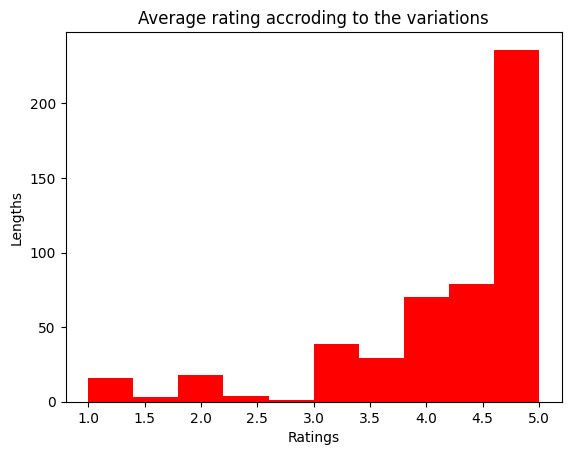

In [67]:
 data.groupby('length')['rating'].mean().plot.hist(color = 'red')
plt.title("Average rating accroding to the variations")
plt.xlabel("Ratings")
plt.ylabel("Lengths")
plt.show()

In [68]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

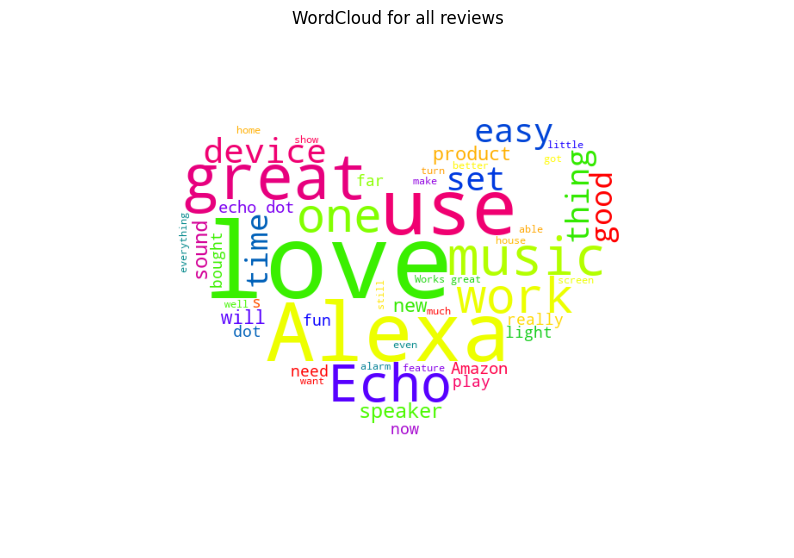

In [70]:
import imageio.v2 as imageio
reviews = " ".join([review for review in data['verified_reviews']])

mask_image = imageio.imread('mask_heart.png')
wc = WordCloud(colormap='prism', mask=mask_image, background_color='white', max_words=50)

plt.figure(figsize=(10,10)) #completely optioal
plt.imshow(wc.generate(reviews))
plt.title("WordCloud for all reviews")
plt.axis('off')
plt.show()

In [74]:
neg_reviews = " ".join([review for review in data[data['feedback']==0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback']==1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

unique_neg = [x for x in neg_reviews if x not in pos_reviews]
unique_neg = " ".join(unique_neg)

unique_pos = [x for x in pos_reviews if x not in neg_reviews]
unique_pos = " ".join(unique_pos)


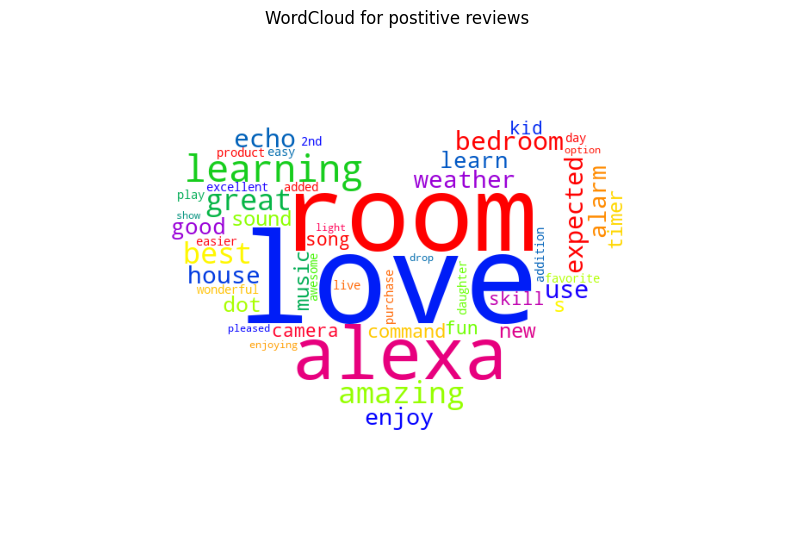

In [76]:
mask_image = imageio.imread('mask_heart.png')
wc = WordCloud(colormap='prism', mask=mask_image, background_color='white', max_words=50)

plt.figure(figsize=(10,10)) #completely optioal
plt.imshow(wc.generate(unique_pos))
plt.title("WordCloud for postitive reviews")
plt.axis('off')
plt.show()

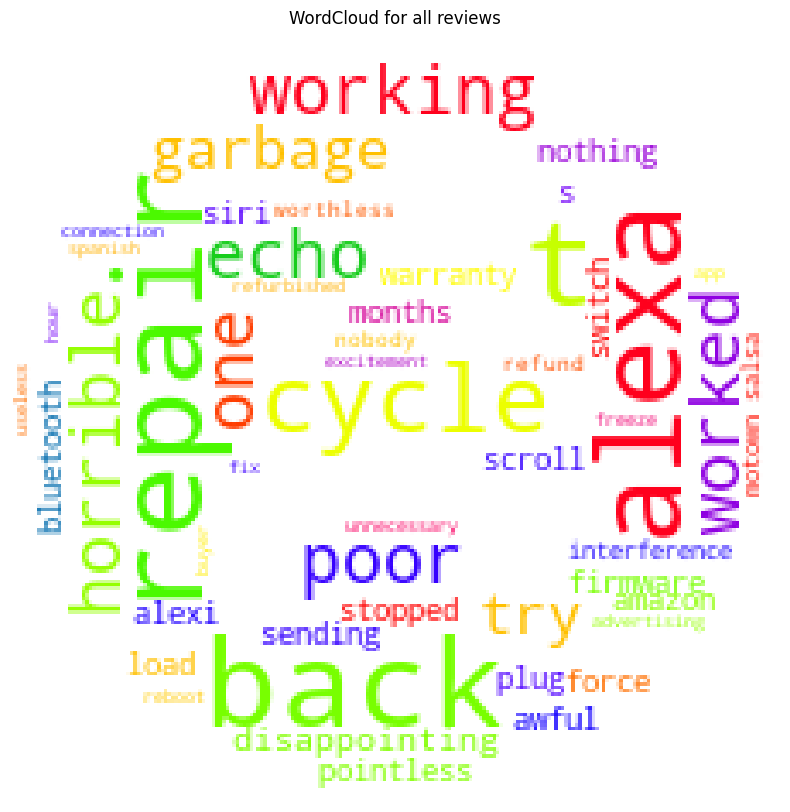

In [78]:
mask_image = imageio.imread('mask_sad.png')
wc = WordCloud(colormap='prism', mask=mask_image, background_color='white', max_words=50)

plt.figure(figsize=(10,10)) #completely optioal
plt.imshow(wc.generate(unique_neg))
plt.title("WordCloud for all reviews")
plt.axis('off')
plt.show()

In [79]:
#Processing and modelling
#1.Replace any non alphabet characters with a space
#2.Convert into lower case and split into words
#3.Iterate over the individual words and if it is not a stopped word then add the stemmed form of the word in corpus

In [80]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

In [81]:
cv = CountVectorizer(max_features = 2500)

X = cv.fit_transform(corpus).toarray()
Y = data['feedback'].values

In [91]:
import os
import pickle

# Specify the absolute path to the file
file_path = os.path.join('C:\jupyter_notebook', 'CountVectorizer.pkl')

# Save the object to the specified file
with open(file_path, 'wb') as f:
    pickle.dump(cv, f)


In [92]:
print(f"X shape: {X.shape}")
print(f"Y shape : {Y.shape}")

X shape: (3149, 2500)
Y shape : (3149,)


In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 15)
print(f" X train = {X_train.shape}")
print(f" y train = {Y_train.shape}")
print(f" X test = {X_test.shape}")
print(f" y test = {Y_test.shape}")

 X train = (2204, 2500)
 y train = (2204,)
 X test = (945, 2500)
 y test = (945,)


In [95]:
print(f" X train max value: {X_train.max()}")
print(f" X test max value: {X_test.max()}")

 X train max value: 12
 X test max value: 10


In [96]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.fit_transform(X_test)

In [97]:
import os
import pickle

# Specify the absolute path to the file
file_path = os.path.join('C:\jupyter_notebook', 'scaler.pkl')

# Save the object to the specified file
with open(file_path, 'wb') as f:
    pickle.dump(scaler, f)


In [98]:
#Fitting scaled X_train and Y_train in Random Forest CLassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, Y_train)

RandomForestClassifier()

In [100]:
print("Training Accuracy: ", model_rf.score(X_train_scl, Y_train))
print("Test Accuracy: ", model_rf.score(X_test_scl, Y_test))


Training Accuracy:  0.9945553539019963
Test Accuracy:  0.9439153439153439


In [101]:
y_preds = model_rf.predict(X_test_scl)

In [103]:
#Confusion Matrix
cm = confusion_matrix(Y_test, y_preds)

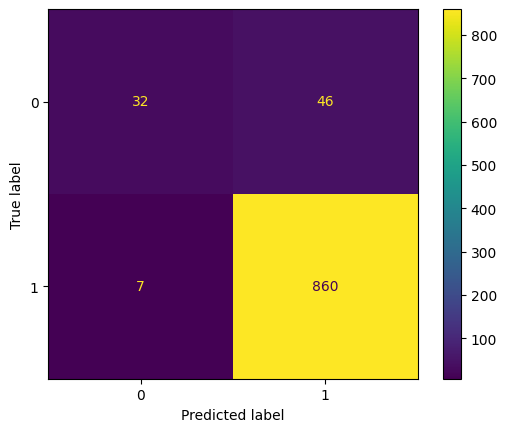

In [105]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()
plt.show()
